## Motif sampling and MACC experiments on COBRE brain networks

In [29]:
#Imports
import numpy as np
from NNetwork import NNetwork as nn
import networkx as nx
#import utils.NNetwork as nn
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics, model_selection
from tqdm import trange
from sklearn.cluster import KMeans
import matplotlib.gridspec as gridspec
from tqdm import trange
from numpy import genfromtxt


In [60]:
def read_COBRE(return_NNetwork=True):

    print("Reading in COBRE networks ...")
    dataset = "COBRE_src"
    school = "COBRE_edges.txt"

    directory = "Data/" + dataset + "/"
    path = directory + school

    edgelist = []
    with open(path) as f:
        for line in f:
            #line = line[0:len(line)-1]
            edgelist.append([float(x) for x in line.split(" ")])

    ## Read in COBRE concatenated brain network edgelists and split them into different networks
    ## Delimiter == [-1,-1]

    network_labels = genfromtxt("Data/COBRE_src/labels.csv", delimiter=' ')
    # 1 == schizophrenic subjects, -1 == healthy subjects

    list_edgelist = []
    edgelist_new = []
    network_number = 0
    for i in trange(len(edgelist)):
        edge = np.asarray([np.round(edgelist[i][0],0), np.round(edgelist[i][1],0)], dtype=int)
        if (edge[0] == -1) and (edge[1] == -1):
            list_edgelist.append([edgelist_new, network_labels[network_number]])
            #np.savetxt("Data/COBRE/COBRE_ntwk_" + str(network_number), edgelist_new)
            edgelist_new = []
            network_number += 1
        else:
            edgelist_new.append([edge[0], edge[1], np.abs(edgelist[i][-1])])
            ## edge weights in COBRE brain networks can be negative
            ## can also consider adding a global constant to make everything nonnegative.
    if not return_NNetwork:
        return list_edgelist
    else:
        G_list = []
        for j in np.arange(len(list_edgelist)):
            G = nn.NNetwork()
            G.add_edges(list_edgelist[j][0])
            G_list.append(G)
        return G_list

In [57]:
list_edgelist[0]

[[[0, 1, 0.937964314609461],
  [0, 2, 0.0368584680692371],
  [0, 3, 0.233516874763017],
  [0, 4, 0.357248456357875],
  [0, 5, 0.300294056099446],
  [0, 6, 0.0726640023563878],
  [0, 7, 0.131153173709415],
  [0, 8, 0.095429745064981],
  [0, 9, 0.00619831869655271],
  [0, 10, 0.15398330755952],
  [0, 11, 0.100951837878352],
  [0, 12, 0.126273813845344],
  [0, 13, 0.0627681911061195],
  [0, 14, 0.22756098237491],
  [0, 15, 0.178012840262403],
  [0, 16, 0.0772309907122155],
  [0, 17, 0.309659106252328],
  [0, 18, 0.157631208417413],
  [0, 19, 0.0828244053597223],
  [0, 20, 0.277405669587304],
  [0, 21, 0.528054309831294],
  [0, 22, 0.372438436313122],
  [0, 23, 0.424243116753436],
  [0, 24, 0.266073184420489],
  [0, 25, 0.139432834758715],
  [0, 26, 0.142789598424273],
  [0, 27, 0.201784310258197],
  [0, 28, 0.0134583979091447],
  [0, 29, 0.0503187399264455],
  [0, 30, 0.169848392963601],
  [0, 31, 0.386034307930434],
  [0, 32, 0.0883459562682425],
  [0, 33, 0.169189068710346],
  [0, 34, 0

In [35]:
list_edgelist = read_COBRE()

Reading in COBRE networks ...


100%|█████████████████████████████| 4272296/4272296 [00:22<00:00, 191953.54it/s]


In [31]:
edgelist = list(np.genfromtxt("Data/COBRE/COBRE_ntwk_0", delimiter=' ', dtype=float))

In [32]:
edgelist

[array([0.        , 1.        , 0.93796431]),
 array([0.        , 2.        , 0.03685847]),
 array([0.        , 3.        , 0.23351687]),
 array([0.        , 4.        , 0.35724846]),
 array([0.        , 5.        , 0.30029406]),
 array([0.      , 6.      , 0.072664]),
 array([0.        , 7.        , 0.13115317]),
 array([0.        , 8.        , 0.09542975]),
 array([ 0.0000000e+00,  9.0000000e+00, -6.1983187e-03]),
 array([ 0.        , 10.        ,  0.15398331]),
 array([ 0.        , 11.        , -0.10095184]),
 array([ 0.        , 12.        , -0.12627381]),
 array([ 0.        , 13.        ,  0.06276819]),
 array([ 0.        , 14.        ,  0.22756098]),
 array([ 0.        , 15.        ,  0.17801284]),
 array([ 0.        , 16.        , -0.07723099]),
 array([ 0.        , 17.        , -0.30965911]),
 array([ 0.        , 18.        , -0.15763121]),
 array([ 0.        , 19.        ,  0.08282441]),
 array([ 0.        , 20.        ,  0.27740567]),
 array([ 0.        , 21.        ,  0.5280

In [33]:
i=0
path = "Data/COBRE/COBRE_ntwk_" + str(i)
edgelist = list(np.genfromtxt("Data/COBRE/COBRE_ntwk_0", delimiter=' ', dtype=float))

In [36]:
G = nn.NNetwork()
G.add_edges(list_edgelist[0][0])

In [44]:
k2 = 10
X, emb = G.get_patches(k=k2, sample_size=100, skip_folded_hom=False, sampling_alg='pivot')

In [45]:
X

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.74292923e-02, 1.42111706e-01, 3.24796226e-01, ...,
        1.33316070e-01, 3.51488332e-01, 5.41625701e-02],
       [2.43838565e-01, 2.94728456e-01, 3.38679608e-01, ...,
        9.69870532e-02, 3.47305909e-01, 2.58296386e-01],
       ...,
       [5.26441246e-01, 1.55947215e-01, 4.37307275e-02, ...,
        5.77790166e-02, 1.30118600e-01, 2.54177381e-02],
       [1.41680908e-01, 3.99405720e-04, 4.64151933e-02, ...,
        2.87038533e-01, 2.79536614e-01, 1.92562155e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [46]:
MACC = np.sum(X, axis=1)/X.shape[1]

In [47]:
MACC

array([0.        , 0.18976241, 0.18227973, 0.21428239, 0.17407555,
       0.20529031, 0.15808111, 0.15004049, 0.1545733 , 0.17634371,
       0.18976241, 0.        , 0.17818962, 0.16799848, 0.17950294,
       0.17975954, 0.17982472, 0.19689087, 0.17821384, 0.1646905 ,
       0.18227973, 0.17818962, 0.        , 0.17797263, 0.16168258,
       0.18297785, 0.189029  , 0.16069006, 0.17859005, 0.16905901,
       0.21428239, 0.16799848, 0.17797263, 0.        , 0.20214616,
       0.16952368, 0.21096867, 0.19520673, 0.15542126, 0.1707909 ,
       0.17407555, 0.17950294, 0.16168258, 0.20214616, 0.        ,
       0.15702853, 0.17101026, 0.16452105, 0.18444966, 0.20064404,
       0.20529031, 0.17975954, 0.18297785, 0.16952368, 0.15702853,
       0.        , 0.19898543, 0.18983492, 0.17977934, 0.1433288 ,
       0.15808111, 0.17982472, 0.189029  , 0.21096867, 0.17101026,
       0.19898543, 0.        , 0.18240564, 0.16225992, 0.14764768,
       0.15004049, 0.19689087, 0.16069006, 0.19520673, 0.16452

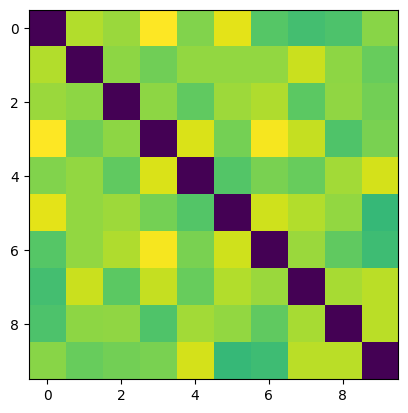

In [48]:
plt.imshow(MACC.reshape(k2,-1))

In [49]:
G.get_wtd_edgelist()

[['0', '10', 0.15398330755952],
 ['0', '169', 0.259327892377723],
 ['0', '63', 0.0309686051186509],
 ['0', '66', 0.200508312662714],
 ['0', '7', 0.131153173709415],
 ['0', '233', 0.533306923367566],
 ['0', '168', 0.258205010798365],
 ['0', '13', 0.0627681911061195],
 ['0', '150', 0.160567010760301],
 ['0', '165', 0.0457669985791751],
 ['0', '207', 0.118323831081286],
 ['0', '228', 0.312852615537273],
 ['0', '20', 0.277405669587304],
 ['0', '138', 0.322973297133295],
 ['0', '200', 0.0302606497451471],
 ['0', '166', 0.125445969064456],
 ['0', '205', 0.154738615187191],
 ['0', '254', 0.400538504587595],
 ['0', '259', 0.35427034507508],
 ['0', '127', 0.0772223856332707],
 ['0', '107', 0.061488574045125],
 ['0', '174', 0.342165969575455],
 ['0', '91', 0.180309957545859],
 ['0', '219', 0.309092771717613],
 ['0', '16', 0.0772309907122155],
 ['0', '261', 0.239443716826075],
 ['0', '15', 0.178012840262403],
 ['0', '139', 0.328263512400169],
 ['0', '192', 0.435073293605226],
 ['0', '34', 0.10361

In [50]:
G = nx.DiGraph()
for e in list_edgelist[1][0]:
    G.add_edge(e[0], e[1], weight=np.abs(e[2]))
    if e[0] != e[1]:
        G.add_edge(e[1], e[0], weight=np.abs(e[2]))

In [51]:
a = nx.adjacency_matrix(G)
a = a.todense()

/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_57286/3938978721.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  a = nx.adjacency_matrix(G)


In [52]:
np.min(a)

0.0

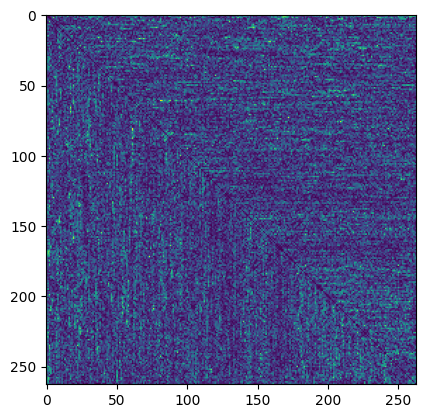

In [53]:
plt.imshow(a)

In [ ]:
X, embs = G.get_patches(k=k2, sample_size=1000, skip_folded_hom=False)

In [ ]:
A = G.get_adjacency_matrix()

In [ ]:
plt.imshow(A)

In [ ]:
plt.imshow(X[:,0].reshape(k2,k2))

## Classification 

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def compute_accuracy_metrics(Y_test, P_pred, use_opt_threshold=False, verbose=False):
    # y_test = binary label 
    # P_pred = predicted probability for y_test
    # compuate various binary classification accuracy metrics
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, P_pred, pos_label=None)
    mythre = thresholds[np.argmax(tpr - fpr)]
    myauc = metrics.auc(fpr, tpr)
    # print('!!! auc', myauc)
    
    # Compute classification statistics
    threshold = 0.5
    if use_opt_threshold:
        threshold = mythre
    
    Y_pred = P_pred.copy()
    Y_pred[Y_pred < threshold] = 0
    Y_pred[Y_pred >= threshold] = 1

    mcm = confusion_matrix(Y_test, Y_pred)
    tn = mcm[0, 0]
    tp = mcm[1, 1]
    fn = mcm[1, 0]
    fp = mcm[0, 1]

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tn / (tn + fp)
    specificity = tp / (tp + fn)
    precision = tp / (tp + fp)
    fall_out = fp / (fp + tn)
    miss_rate = fn / (fn + tp)

    # Save results
    results_dict = {}
    results_dict.update({'Y_test': Y_test})
    results_dict.update({'Y_pred': Y_pred})
    results_dict.update({'AUC': myauc})
    results_dict.update({'Opt_threshold': mythre})
    results_dict.update({'Accuracy': accuracy})
    results_dict.update({'Sensitivity': sensitivity})
    results_dict.update({'Specificity': specificity})
    results_dict.update({'Precision': precision})
    results_dict.update({'Fall_out': fall_out})
    results_dict.update({'Miss_rate': miss_rate})
    
    if verbose:
        for key in [key for key in results_dict.keys()]:
            print('% s ===> %.3f' % (key, results_dict.get(key)))
    return results_dict

In [ ]:
list_edgelist = read_COBRE()

In [55]:
len(list_edgelist)

124

In [54]:
k = 10

X_MACC = []
X_patches = []
X_edge_density = []
X_adj = []


for i in trange(124):
    #path = "Data/COBRE/COBRE_ntwk_" + str(i)
    #edgelist = list(np.genfromtxt("Data/COBRE/COBRE_ntwk_0", delimiter=' ', dtype=float))
    G = nn.NNetwork()
    G.add_edges(list_edgelist[i][0])

    title = str(i)
    #t0 = time()
    X, emb = G.get_patches(k=k, sample_size=1000, skip_folded_hom=False, sampling_alg='glauber')
    X_patches.append(X)
    
    MACC = np.sum(X, axis=1)/X.shape[1]
    MACC = MACC.reshape(k,k)
    X_MACC.append(MACC)
    #t1 = time() - t0

    """
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), subplot_kw={'xticks': [], 'yticks': []})
    # hom_mx = hom_mx - np.diag(np.ones(k-1), k=1) - np.diag(np.ones(k-1), k=-1
    axs.imshow(MACC, cmap="viridis", interpolation='nearest')

    plt.suptitle("COBRE_" + str(i))
    fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0)
    fig.savefig('COBRE_sim/' + str(title) + ".png")
    np.save("COBRE_sim/" + str(title), MACC)
    """

    ### record network sizes and computation time
    A_adj = G.get_adjacency_matrix()
    #l_sub = {'computation time': t1-t0,
    #         'num nodes': len(G.nodes()),
    #         'avg deg': np.linalg.norm(A_adj, 1)/len(G.nodes())}
    #dict_comp_time.update({str(i):l_sub})
    
    X_edge_density.append(np.linalg.norm(A_adj, 1)/len(G.nodes()))
    X_adj.append(A_adj)
    
    # np.save("COBRE_sim/dict_computation_time", dict_comp_time)
    #print('time spent:', t1)
    # print(chd_mx)

 24%|██████████▏                               | 30/124 [00:33<01:46,  1.13s/it]


KeyboardInterrupt: 

In [56]:
y = np.asarray((genfromtxt("Data/COBRE_src/labels.csv", delimiter=' ')+1)/2, dtype='int' )
X_train_idx, X_test_idx, y_train, y_test = train_test_split(np.arange(len(y)), y, test_size=0.33, random_state=42)

In [ ]:
# Using full adjacency matrix 
X = np.asarray(X_adj).reshape(-1,263**2)
X_train = X[X_train_idx,:]
X_test = X[X_test_idx,:]

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
P_pred = clf.predict_proba(X_test)
#print("P_pred", P_pred)

compute_accuracy_metrics(y_test, P_pred[:,1], use_opt_threshold=False, verbose=False)

In [ ]:
plt.imshow(X_patches[0][:,20].reshape(k,k))

In [ ]:
X = np.asarray(X_patches).reshape(124,-1)

In [ ]:
scale=1

# Using MCMC trajectory of subgraph patches
X = np.asarray(X_patches).reshape(124,-1)
X_train = X[X_train_idx,:]
X_test = X[X_test_idx,:]

clf = LogisticRegression(random_state=0).fit(X_train/scale, y_train)
y_pred = clf.predict(X_test/scale)
P_pred = clf.predict_proba(X_test/scale)

compute_accuracy_metrics(y_test, P_pred[:,1], use_opt_threshold=False, verbose=False)





In [ ]:
scale=1

# Using MACC
X = np.asarray(X_MACC).reshape(-1,k**2)
X_train = X[X_train_idx,:]
X_test = X[X_test_idx,:]

clf = LogisticRegression(random_state=0).fit(X_train/scale, y_train)
y_pred = clf.predict(X_test/scale)
P_pred = clf.predict_proba(X_test/scale)

compute_accuracy_metrics(y_test, P_pred[:,1], use_opt_threshold=False, verbose=False)




In [ ]:
# Using edge density
X = np.asarray(X_edge_density)[:, np.newaxis]
X_train = X[X_train_idx,:]
X_test = X[X_test_idx,:]

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
P_pred = clf.predict_proba(X_test)

compute_accuracy_metrics(y_test, P_pred[:,1], use_opt_threshold=False, verbose=False)



In [71]:
y = np.asarray((genfromtxt("Data/COBRE_src/labels.csv", delimiter=' ')+1)/2, dtype='int' )
X_train_idx, X_test_idx, y_train, y_test = train_test_split(np.arange(len(y)), y, test_size=0.33, random_state=42)


nn_network_list = read_COBRE(return_NNetwork=True)

subgraph_list_dict = {}
output_dict_list_total = {}

Reading in COBRE networks ...


100%|█████████████████████████████| 4272296/4272296 [00:22<00:00, 187557.96it/s]


In [64]:
len(nn_network_list)

124

In [73]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [74]:
num_subgraphs = 10
y0 = np.repeat(y,num_subgraphs)
k0_list = [5,10,15]

for k in k_list:
    print("sampling subgraphs with k={} nodes".format(k))
    subgraph_list = []
    for a in trange(len(nn_network_list)):
        G = nn_network_list[a]
        
        for i in np.arange(num_subgraphs):
            label_list.append(str(ntwk))

            # take the induced subgraph 
            X, embs = G.get_patches(k=k, sample_size=10, skip_folded_hom=False, sampling_alg = 'pivot')
            H = G.subgraph(embs[-1]) # take the last instance of MCMC sampling
            #A_adj = H.get_adjacency_matrix()
            subgraph_list.append(H)
            #subgraph_list.append(A_adj)

            """
            ## compute summary stats of subgraphs 

            A_adj = H.get_adjacency_matrix()
            X_adj.append(A_adj)

            X0, embs0 = H.get_patches(k=k0, sample_size=1000, skip_folded_hom=False, sampling_alg = 'pivot')
            MACC = np.sum(X0, axis=1)/X0.shape[1]
            MACC = MACC.reshape(k0,k0)
            X_MACC.append(MACC)

            X_edge_density.append(np.linalg.norm(A_adj, 1)/len(H.nodes()))
            """

    subgraph_list_dict.update({"k={}".format(k) : subgraph_list})

    print("extracting subgraph features..")
    output_dict_list = datagen_graph_features(X=subgraph_list, k0_list = k0_list)
    results_dict_total = run_binary_classification(output_dict_list, y=y0)
    
    output_dict_list_total.update({"k={}".format(k): results_dict_total})

sampling subgraphs with k=100 nodes


100%|█████████████████████████████████████████| 124/124 [04:17<00:00,  2.08s/it]


extracting subgraph features..


100%|███████████████████████████████████████| 1240/1240 [23:41<00:00,  1.15s/it]
/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_57286/1241973894.py:33: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)
/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_57286/1241973894.py:33: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)
/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_57286/1241973894.py:33: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)
/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_57286/1241973894.py:33: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)
/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_57286/1241973894.py:33: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)
/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_57286/1241

X.shape (1240, 1)
method = num_nodes, AUC = 0.463450
X.shape (1240, 1)
method = num_edges, AUC = 0.463450
X.shape (1240, 1)
method = min_degree, AUC = 0.463450
X.shape (1240, 1)
method = max_degree, AUC = 0.463450
X.shape (1240, 1)
method = diameter, AUC = 0.500000
X.shape (1240, 1)
method = degree_assortativity_coef, AUC = 0.500000
X.shape (1240, 1)
method = num_cliques, AUC = 0.463450
X.shape (1240, 1)
method = Avg_clustering_coeff, AUC = 0.500000
X.shape (1240, 1)
method = edeg_density, AUC = 0.500000
X.shape (1240, 25)
method = MACC k0=5, AUC = 0.508555
X.shape (1240, 100)
method = MACC k0=10, AUC = 0.430514
X.shape (1240, 225)
method = MACC k0=15, AUC = 0.478895
sampling subgraphs with k=110 nodes


100%|█████████████████████████████████████████| 124/124 [05:01<00:00,  2.43s/it]


extracting subgraph features..


  0%|                                                  | 0/1240 [00:00<?, ?it/s]/Users/hanbaek/opt/miniconda3/envs/hlyuenv/lib/python3.9/site-packages/networkx/algorithms/assortativity/correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
100%|███████████████████████████████████████| 1240/1240 [25:32<00:00,  1.24s/it]
/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_57286/1241973894.py:33: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)
/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_57286/1241973894.py:33: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)
/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_57286/1241973894.py:33: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)
/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_57286/1241973894.py:33: Runtime

X.shape (1240, 1)
method = num_nodes, AUC = 0.475444
X.shape (1240, 1)
method = num_edges, AUC = 0.475444
X.shape (1240, 1)
method = min_degree, AUC = 0.475444
X.shape (1240, 1)
method = max_degree, AUC = 0.475444
X.shape (1240, 1)
method = diameter, AUC = 0.500000
X.shape (1240, 1)
method = degree_assortativity_coef, AUC = 0.500000
X.shape (1240, 1)
method = num_cliques, AUC = 0.475444
X.shape (1240, 1)
method = Avg_clustering_coeff, AUC = 0.500000
X.shape (1240, 1)
method = edeg_density, AUC = 0.500000
X.shape (1240, 25)
method = MACC k0=5, AUC = 0.487693
X.shape (1240, 100)
method = MACC k0=10, AUC = 0.505194
X.shape (1240, 225)
method = MACC k0=15, AUC = 0.477580
sampling subgraphs with k=120 nodes


100%|█████████████████████████████████████████| 124/124 [05:58<00:00,  2.89s/it]


extracting subgraph features..


  0%|                                                  | 0/1240 [00:00<?, ?it/s]/Users/hanbaek/opt/miniconda3/envs/hlyuenv/lib/python3.9/site-packages/networkx/algorithms/assortativity/correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
100%|███████████████████████████████████████| 1240/1240 [27:01<00:00,  1.31s/it]
/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_57286/1241973894.py:33: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)
/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_57286/1241973894.py:33: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)
/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_57286/1241973894.py:33: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)
/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_57286/1241973894.py:33: Runtime

X.shape (1240, 1)
method = num_nodes, AUC = 0.495193
X.shape (1240, 1)
method = num_edges, AUC = 0.495193
X.shape (1240, 1)
method = min_degree, AUC = 0.495193
X.shape (1240, 1)
method = max_degree, AUC = 0.495193
X.shape (1240, 1)
method = diameter, AUC = 0.500000
X.shape (1240, 1)
method = degree_assortativity_coef, AUC = 0.500000
X.shape (1240, 1)
method = num_cliques, AUC = 0.495193
X.shape (1240, 1)
method = Avg_clustering_coeff, AUC = 0.500000
X.shape (1240, 1)
method = edeg_density, AUC = 0.500000
X.shape (1240, 25)
method = MACC k0=5, AUC = 0.510060
X.shape (1240, 100)
method = MACC k0=10, AUC = 0.535268
X.shape (1240, 225)
method = MACC k0=15, AUC = 0.497530
sampling subgraphs with k=130 nodes


100%|█████████████████████████████████████████| 124/124 [07:04<00:00,  3.42s/it]


extracting subgraph features..


  0%|                                                  | 0/1240 [00:00<?, ?it/s]/Users/hanbaek/opt/miniconda3/envs/hlyuenv/lib/python3.9/site-packages/networkx/algorithms/assortativity/correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
100%|███████████████████████████████████████| 1240/1240 [27:43<00:00,  1.34s/it]

X.shape (1240, 1)
method = num_nodes, AUC = 0.472677
X.shape (1240, 1)
method = num_edges, AUC = 0.472677
X.shape (1240, 1)
method = min_degree, AUC = 0.472677
X.shape (1240, 1)
method = max_degree, AUC = 0.472677
X.shape (1240, 1)
method = diameter, AUC = 0.500000
X.shape (1240, 1)
method = degree_assortativity_coef, AUC = 0.500000
X.shape (1240, 1)
method = num_cliques, AUC = 0.472677
X.shape (1240, 1)
method = Avg_clustering_coeff, AUC = 0.500000
X.shape (1240, 1)
method = edeg_density, AUC = 0.500000
X.shape (1240, 25)
method = MACC k0=5, AUC = 0.481470
X.shape (1240, 100)
method = MACC k0=10, AUC = 0.489983
X.shape (1240, 225)
method = MACC k0=15, AUC = 0.499523



/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_57286/1241973894.py:33: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)
/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_57286/1241973894.py:33: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)
/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_57286/1241973894.py:33: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)
/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_57286/1241973894.py:33: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)
/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_57286/1241973894.py:33: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)
/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_57286/1241973894.py:33: RuntimeWarning: invalid value encountered in long_scalars
  precis

## Subgraph classification for Facebook networks 

In [69]:
# X: a list of NNetwork objects
# num_edges, num_nodes, min_degree, max_degree, diameter
import math

def MACC_nx(G, k):
    # G = networkx Network
    # k = length of chain motif
    # Compute k x k Matrix of Average Clustering Coefficients
    G_nn = nn.NNetwork()
    G_nn.add_edges( list(G.edges) )
    X0, embs0 = G_nn.get_patches(k=k, sample_size=1000, skip_folded_hom=False, sampling_alg = 'pivot')
    MACC = np.sum(X0, axis=1)/X0.shape[1]
    MACC = MACC.reshape(k,k)
    return MACC

def datagen_graph_features(X, k0_list):
    # generate the toy dataset
    # file = open(file_name, 'w+', newline='')
    output_dict_list = []
    
    header = ["num_edges", "num_nodes", "min_degree", "max_degree", "diameter", 
              "degree_assortativity_coef", "num_clique", "avg_clustering_coef", 
              "density"]
  
    for i in trange(len(X)): #X.shape[1]: total number of graphs
                                #X.shape[0]: num_nodes^2
        output_dict = {}
        G_nn = X[i]
        G=nx.Graph(G_nn.get_edges())
        
        num_edges = G.number_of_edges()
        min_degree = min(list(G.degree), key=lambda x: x[1])[1]
        max_degree = max(list(G.degree), key=lambda x: x[1])[1]
        diameter = nx.diameter(G)

        degree_assortativity_coef = nx.degree_assortativity_coefficient(G)
        num_clique = nx.graph_clique_number(G)
        avg_clustering_coef = nx.average_clustering(G)
        #small_world_coef = nx.omega(G)
        density = nx.density(G)

        output_dict.update({"num_nodes": len(G.nodes())})
        output_dict.update({"num_edges": G.number_of_edges()})
        output_dict.update({"min_degree": min(list(G.degree), key=lambda x: x[1])[1]})
        output_dict.update({"max_degree": max(list(G.degree), key=lambda x: x[1])[1]})
        output_dict.update({"diameter": nx.diameter(G)})
        a = nx.degree_assortativity_coefficient(G)
        if math.isnan(a):
            a = 0
        output_dict.update({"degree_assortativity_coef": a})
        output_dict.update({"num_cliques": nx.graph_clique_number(G)})
        output_dict.update({"Avg_clustering_coeff": nx.average_clustering(G)})
        output_dict.update({"edeg_density": nx.density(G)})
        for k0 in k0_list:
            output_dict.update({"MACC k0={}".format(k0): MACC_nx(G, k=k0)})

        output_dict_list.append(output_dict)
        
    return output_dict_list

def run_binary_classification(output_dict_list, y, scale=1):

    X_train_idx, X_test_idx, y_train, y_test = train_test_split(np.arange(len(y)), y, test_size=0.50, random_state=42)        

    
    keys = list(output_dict_list[0].keys())
    results_dict_total = {}
    for key in keys:
        feature_vector_list = []
        for i in np.arange(len(output_dict_list) ):
            output_dict = output_dict_list[i]
            key
            if key.split(" ")[0] == "MACC":
                feature_vector_list.append(output_dict.get(key).reshape(-1,1)) 
            else: 
                feature_vector_list.append(output_dict.get(key)) 

        X = np.asarray(feature_vector_list)
        if key.split(" ")[0] == "MACC":
            X = X.reshape(len(feature_vector_list), -1) 
        else: 
            X = X[:,np.newaxis]

        print("X.shape", X.shape)

        X_train = X[X_train_idx,:]
        X_test = X[X_test_idx,:]

        clf = LogisticRegression(random_state=0).fit((X_train-np.mean(X_train, axis=0))/scale, y_train)
        y_pred = clf.predict((X_test-np.mean(X_test, axis=0))/scale)
        P_pred = clf.predict_proba((X_test-np.mean(X_test, axis=0))/scale)

        results_dict = compute_accuracy_metrics(y_test, P_pred[:,1], use_opt_threshold=False, verbose=False)

        print("method = {}, AUC = {:f}".format(key, results_dict.get("AUC")))

        results_dict_total.update({key: results_dict})
    return results_dict_total
    

In [28]:
# Subgraph sampling for subgraph classification
# Output = subgraph_list as NNetwork objects

ntwk_list = ['Wisconsin87', 'UCLA26'] # Wisconsin87, UCLA26, Caltech36
label_list = []
subgraph_list = []
num_subgraphs = 100
k_list = [100,110, 120,130]
k0_list = [5,10,15,20,25,30]

#X_MACC = []
#X_edge_density = []
#X_adj = []

nn_network_list = []
for ntwk in ntwk_list:
    ntwk_nonumber = ''.join([i for i in ntwk if not i.isdigit()])
    path = "Data/Facebook/" + str(ntwk) + '.txt'
    G = nn.NNetwork()
    G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
    nn_network_list.append(G)
    print('num nodes in G', len(G.nodes()))
    print('num edges in G', len(G.get_edges()))

y = [0]*num_subgraphs + [1]*num_subgraphs

subgraph_list_dict = {}
output_dict_list_total = {}

for k in k_list:
    print("sampling subgraphs with k={} nodes".format(k))
    subgraph_list = []
    for a in np.arange(len(nn_network_list)):
        G = nn_network_list[a]
        
        for i in trange(num_subgraphs):
            label_list.append(str(ntwk))

            # take the induced subgraph 
            X, embs = G.get_patches(k=k, sample_size=10, skip_folded_hom=False, sampling_alg = 'pivot')
            H = G.subgraph(embs[-1]) # take the last instance of MCMC sampling
            #A_adj = H.get_adjacency_matrix()
            subgraph_list.append(H)
            #subgraph_list.append(A_adj)

            """
            ## compute summary stats of subgraphs 

            A_adj = H.get_adjacency_matrix()
            X_adj.append(A_adj)

            X0, embs0 = H.get_patches(k=k0, sample_size=1000, skip_folded_hom=False, sampling_alg = 'pivot')
            MACC = np.sum(X0, axis=1)/X0.shape[1]
            MACC = MACC.reshape(k0,k0)
            X_MACC.append(MACC)

            X_edge_density.append(np.linalg.norm(A_adj, 1)/len(H.nodes()))
            """

    subgraph_list_dict.update({"k={}".format(k) : subgraph_list})

    print("extracting subgraph features..")
    output_dict_list = datagen_graph_features(X=subgraph_list, k0_list = k0_list)
    results_dict_total = run_binary_classification(output_dict_list, y=y, scale=1)
    
    output_dict_list_total.update({"k={}".format(k): results_dict_total})

num nodes in G 23842
num edges in G 1671904
num nodes in G 20467
num edges in G 1495226
sampling subgraphs with k=100 nodes


100%|█████████████████████████████████████████| 100/100 [00:17<00:00,  5.71it/s]


extracting subgraph features..


100%|█████████████████████████████████████████| 200/200 [10:10<00:00,  3.05s/it]


X.shape (200, 1)
method = num_nodes, AUC = 0.481192
X.shape (200, 1)
method = num_edges, AUC = 0.609044
X.shape (200, 1)
method = min_degree, AUC = 0.487795
X.shape (200, 1)
method = max_degree, AUC = 0.650060
X.shape (200, 1)
method = diameter, AUC = 0.611445
X.shape (200, 1)
method = degree_assortativity_coef, AUC = 0.585034
X.shape (200, 1)
method = num_cliques, AUC = 0.473990
X.shape (200, 1)
method = Avg_clustering_coeff, AUC = 0.518607
X.shape (200, 1)
method = edeg_density, AUC = 0.608844
X.shape (200, 25)
method = MACC k0=5, AUC = 0.665866
X.shape (200, 100)
method = MACC k0=10, AUC = 0.699880
X.shape (200, 225)
method = MACC k0=15, AUC = 0.712685
X.shape (200, 400)
method = MACC k0=20, AUC = 0.720288
X.shape (200, 625)
method = MACC k0=25, AUC = 0.741897
X.shape (200, 900)
method = MACC k0=30, AUC = 0.731092
sampling subgraphs with k=110 nodes


100%|█████████████████████████████████████████| 100/100 [00:19<00:00,  5.24it/s]


extracting subgraph features..


100%|█████████████████████████████████████████| 200/200 [10:12<00:00,  3.06s/it]


X.shape (200, 1)
method = num_nodes, AUC = 0.450180
X.shape (200, 1)
method = num_edges, AUC = 0.616046
X.shape (200, 1)
method = min_degree, AUC = 0.533013
X.shape (200, 1)
method = max_degree, AUC = 0.630052
X.shape (200, 1)
method = diameter, AUC = 0.580032
X.shape (200, 1)
method = degree_assortativity_coef, AUC = 0.599040
X.shape (200, 1)
method = num_cliques, AUC = 0.566627
X.shape (200, 1)
method = Avg_clustering_coeff, AUC = 0.469788
X.shape (200, 1)
method = edeg_density, AUC = 0.612445
X.shape (200, 25)
method = MACC k0=5, AUC = 0.679472
X.shape (200, 100)
method = MACC k0=10, AUC = 0.665066
X.shape (200, 225)
method = MACC k0=15, AUC = 0.690676
X.shape (200, 400)
method = MACC k0=20, AUC = 0.735894
X.shape (200, 625)
method = MACC k0=25, AUC = 0.711485
X.shape (200, 900)
method = MACC k0=30, AUC = 0.667067
sampling subgraphs with k=120 nodes


100%|█████████████████████████████████████████| 100/100 [00:21<00:00,  4.73it/s]


extracting subgraph features..


100%|█████████████████████████████████████████| 200/200 [10:08<00:00,  3.04s/it]


X.shape (200, 1)
method = num_nodes, AUC = 0.496799
X.shape (200, 1)
method = num_edges, AUC = 0.701080
X.shape (200, 1)
method = min_degree, AUC = 0.491797
X.shape (200, 1)
method = max_degree, AUC = 0.686875
X.shape (200, 1)
method = diameter, AUC = 0.423970
X.shape (200, 1)
method = degree_assortativity_coef, AUC = 0.706283
X.shape (200, 1)
method = num_cliques, AUC = 0.601441
X.shape (200, 1)
method = Avg_clustering_coeff, AUC = 0.472989
X.shape (200, 1)
method = edeg_density, AUC = 0.688075
X.shape (200, 25)
method = MACC k0=5, AUC = 0.573830
X.shape (200, 100)
method = MACC k0=10, AUC = 0.584234
X.shape (200, 225)
method = MACC k0=15, AUC = 0.520608
X.shape (200, 400)
method = MACC k0=20, AUC = 0.563025
X.shape (200, 625)
method = MACC k0=25, AUC = 0.577031
X.shape (200, 900)
method = MACC k0=30, AUC = 0.550620
sampling subgraphs with k=130 nodes


100%|█████████████████████████████████████████| 100/100 [00:23<00:00,  4.17it/s]


extracting subgraph features..


100%|█████████████████████████████████████████| 200/200 [10:10<00:00,  3.05s/it]

X.shape (200, 1)
method = num_nodes, AUC = 0.641056
X.shape (200, 1)
method = num_edges, AUC = 0.587435
X.shape (200, 1)
method = min_degree, AUC = 0.503201
X.shape (200, 1)
method = max_degree, AUC = 0.678872
X.shape (200, 1)
method = diameter, AUC = 0.460784
X.shape (200, 1)
method = degree_assortativity_coef, AUC = 0.818727
X.shape (200, 1)
method = num_cliques, AUC = 0.614846
X.shape (200, 1)
method = Avg_clustering_coeff, AUC = 0.558623
X.shape (200, 1)
method = edeg_density, AUC = 0.625650
X.shape (200, 25)
method = MACC k0=5, AUC = 0.584234
X.shape (200, 100)
method = MACC k0=10, AUC = 0.623049
X.shape (200, 225)
method = MACC k0=15, AUC = 0.639056
X.shape (200, 400)
method = MACC k0=20, AUC = 0.676671
X.shape (200, 625)
method = MACC k0=25, AUC = 0.596238
X.shape (200, 900)
method = MACC k0=30, AUC = 0.661865


In [24]:
results_dict_total = run_binary_classification(output_dict_list, scale=1)

X.shape (200, 1)
method = num_nodes, AUC = 0.513605
X.shape (200, 1)
method = num_edges, AUC = 0.481793
X.shape (200, 1)
method = min_degree, AUC = 0.491797
X.shape (200, 1)
method = max_degree, AUC = 0.578031
X.shape (200, 1)
method = diameter, AUC = 0.566627
X.shape (200, 1)
method = degree_assortativity_coef, AUC = 0.560624
X.shape (200, 1)
method = num_cliques, AUC = 0.518607
X.shape (200, 1)
method = Avg_clustering_coeff, AUC = 0.558023
X.shape (200, 1)
method = edeg_density, AUC = 0.486194
X.shape (200, 25)
method = MACC k0=5, AUC = 0.497399
X.shape (200, 100)
method = MACC k0=10, AUC = 0.562225
X.shape (200, 225)
method = MACC k0=15, AUC = 0.514606
X.shape (200, 400)
method = MACC k0=20, AUC = 0.510604
X.shape (200, 625)
method = MACC k0=25, AUC = 0.519008
X.shape (200, 900)
method = MACC k0=30, AUC = 0.570628


In [ ]:
# Using full adjacency matrix 
X = np.asarray(X_adj).reshape(-1,k0**2)
print("X.shape", X.shape)
X_train = X[X_train_idx,:]
X_test = X[X_test_idx,:]

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
P_pred = clf.predict_proba(X_test)
#print("P_pred", P_pred)

compute_accuracy_metrics(y_test, P_pred[:,1], use_opt_threshold=False, verbose=False)

In [ ]:
def display_graphs(title,
                     save_path,
                     grid_shape=[2,3],
                     fig_size=[10,10],
                     data = None, # [X, embs]
                     show_importance=False):

        # columns of X = vectorized k x k adjacency matrices
        # corresponding list in embs = sequence of nodes (may overalp)
        X, embs = data
        print('X.shape', X.shape)

        rows = grid_shape[0]
        cols = grid_shape[1]

        fig = plt.figure(figsize=fig_size, constrained_layout=False)
        # make outer gridspec

        idx = np.arange(X.shape[1])
        outer_grid = gridspec.GridSpec(nrows=rows, ncols=cols, wspace=0.02, hspace=0.05)

        # make nested gridspecs
        for i in range(rows * cols):
            a = i // cols
            b = i % rows

            Ndict_wspace = 0.05
            Ndict_hspace = 0.05

            # display graphs
            inner_grid = outer_grid[i].subgridspec(1, 1, wspace=Ndict_wspace, hspace=Ndict_hspace)

            # get rid of duplicate nodes
            A = X[:,idx[i]]
            A = X[:,idx[i]].reshape(int(np.sqrt(X.shape[0])), -1)
            H = nn.NNetwork()
            H.read_adj(A, embs[idx[i]])
            A_sub = H.get_adjacency_matrix()

            # read in as a nx graph for plotting
            G1 = nx.from_numpy_matrix(A_sub)
            ax = fig.add_subplot(inner_grid[0, 0])
            pos = nx.spring_layout(G1)
            edges = G1.edges()
            weights = [1*G1[u][v]['weight'] for u,v in edges]
            nx.draw(G1, with_labels=False, node_size=20, ax=ax, width=weights, label='Graph')

            ax.set_xticks([])
            ax.set_yticks([])

        plt.suptitle(title, fontsize=15)
        fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0)
        fig.savefig(save_path, bbox_inches='tight')

In [ ]:
def display_dict_and_graph(title,
                           W, 
                           singular_values, 
                         save_path,
                         grid_shape=None,
                         fig_size=[10,10],
                         show_importance=False):
        
        n_components = W.shape[1]
        k = int(np.sqrt(W.shape[0]))

        rows = np.round(np.sqrt(n_components))
        rows = rows.astype(int)
        if grid_shape is not None:
            rows = grid_shape[0]
            cols = grid_shape[1]
        else:
            if rows ** 2 == n_components:
                cols = rows
            else:
                cols = rows + 1

        if show_importance:
            # importance = np.sum(self.code, axis=1) / sum(sum(self.code))
            idx = np.argsort(singular_values)
            idx = np.flip(idx)
        else:
            idx = np.arange(W.shape[1])

        Ndict_wspace = 0.05
        Ndict_hspace = 0.05

        fig = plt.figure(figsize=fig_size, constrained_layout=False)
        outer_grid = gridspec.GridSpec(nrows=1, ncols=2, wspace=0.02, hspace=0.05)
        for t in np.arange(2):
            # make nested gridspecs

            if t == 0:
                ### Make gridspec
                inner_grid = outer_grid[t].subgridspec(rows, cols, wspace=Ndict_wspace, hspace=Ndict_hspace)
                #gs1 = fig.add_gridspec(nrows=rows, ncols=cols, wspace=0.05, hspace=0.05)

                for i in range(rows * cols):
                    a = i // cols
                    b = i % cols
                    ax = fig.add_subplot(inner_grid[a, b])
                    ax.imshow(W.T[idx[i]].reshape(k, k), cmap="viridis", interpolation='nearest')
                    # ax.set_xlabel('%1.2f' % importance[idx[i]], fontsize=13)  # get the largest first
                    # ax.xaxis.set_label_coords(0.5, -0.05)  # adjust location of importance appearing beneath patches
                    ax.set_xticks([])
                    ax.set_yticks([])
            if t == 1:
                inner_grid = outer_grid[t].subgridspec(rows, cols, wspace=Ndict_wspace, hspace=Ndict_hspace)
                #gs1 = fig.add_gridspec(nrows=rows, ncols=cols, wspace=0.05, hspace=0.05)

                for i in range(rows * cols):
                    a = i // cols
                    b = i % cols

                    G1 = nx.from_numpy_matrix(W[:,idx[i]].reshape(int(np.sqrt(W.shape[0])),-1))
                    ax = fig.add_subplot(inner_grid[a, b])
                    pos = nx.spring_layout(G1)
                    edges = G1.edges()
                    weights = [5*G1[u][v]['weight'] for u,v in edges]
                    nx.draw(G1, with_labels=False, node_size=10, ax=ax, width=weights, label='Graph')
                    if show_importance:
                        ax.set_xlabel('%1.2f' % importance[idx[i]], fontsize=13)  # get the largest first
                        ax.xaxis.set_label_coords(0.5, -0.05)  # adjust location of importance appearing beneath patches

                    ax.set_xticks([])
                    ax.set_yticks([])

        plt.suptitle(title, fontsize=25)
        fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0)
        fig.savefig(save_path, bbox_inches='tight')

In [ ]:
sampling_alg = 'pivot'

ntwk = 'Caltech36' # COVID_PPI, Wisconsin87, UCLA26
ntwk_nonumber = ''.join([i for i in ntwk if not i.isdigit()])
save_folder = 'temp/'
k=10

path = "Data/Networks_all_NDL/" + str(ntwk) + '.txt'
G = nn.NNetwork()
G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
print('num nodes in G', len(G.nodes()))
print('num edges in G', len(G.get_edges()))

#mx0 = G.get_adjacency_matrix(ordered_node_list=G.nodes())
#plt.imshow(mx0)

In [ ]:
X, embs = G.get_patches(k=k, sample_size=1000, skip_folded_hom=True)

display_graphs(title='induced subgraphs on {}-walks in {}'.format(k, ntwk_nonumber),
                 save_path=save_folder + ntwk_nonumber + "_subgraphs_"+ str(sampling_alg) + "_walk", 
                 data = [X, embs],
                 grid_shape = [5, 15],
                 fig_size = [15, 5],
                 show_importance=False)

In [ ]:
np.save("MC_data_matrix", X)

In [ ]:
plt.imshow(X[:,4].reshape(k,k))

In [ ]:
from sklearn.decomposition import PCA ### Use truncated SVD / online PCA later for better computational efficiency 
pca = PCA(n_components=25)
pca.fit(X)

In [ ]:
Y = pca.fit_transform(X)
singular_values = pca.singular_values_

In [ ]:
display_dict_and_graph(title='{}-node induced subgraphs in {} (sampling : {})'.format(k, ntwk_nonumber, sampling_alg),
                 save_path=save_folder + ntwk_nonumber + "_subgraphs_"+ str(sampling_alg), 
                 W = Y,
                 singular_values = singular_values,
                 grid_shape = [5, 5],
                 fig_size = [15, 10],
                 show_importance=False)